# <font style="color:rgb(50, 120, 229);"> Fashion MNIST con Keras </font>

Ya has visto cómo implementar MLPs (Perceptrones Multicapa) utilizando Keras.

En esta tarea, vamos a seguir adelante e implementar un MLP (Perceptrón Multicapa) simple.

Estaremos utilizando el **Conjunto de Datos Fashion MNIST**, que es un conjunto de datos muy popular y simple para llevar a cabo tareas de clasificación. Realizaremos una tarea de clasificación multiclase utilizando este conjunto de datos.

<center>
<img src="https://github.com/sofiapapadron/IME_IAA/blob/main/Teoria/2_Clasificacion_imagenes_Keras/1_Fundamentos_Keras/apps/images/fashion_mnist.jpg?raw=1" width=600px>
</center>


Hay 10 clases. Cada ejemplo de entrenamiento y prueba es una imagen de `28x28` y se asigna a una de las siguientes etiquetas:

| Etiqueta | Descripción |
| --- | --- |
| 0 | Camiseta/top |
| 1 | Pantalón |
| 2 | Pullover |
| 3 | Vestido |
| 4 | Abrigo |
| 5 | Sandalia |
| 6 | Camisa |
| 7 | Zapatilla |
| 8 | Bolso |
| 9 | Bota de tobillo |

### <font style="color:rgb(50,120,230)">1. Implementar el Modelo MLP</font>

Aquí, la tarea es clasificar objetos en un conjunto de datos, así que necesitas implementar un modelo MLP simple con 10 clases de salida. Asegúrate de que sea un modelo muy simple que contenga solo unas pocas capas `Dense`, con un número mínimo de nodos/unidades.

**Nota: Recuerda usar la activación `softmax` para la última capa Dense.**


### <font style="color:rgb(50,120,230)">2. Obtención de la precisión deseada en los datos de prueba</font>

Una vez que hayas definido el modelo, puedes entrenarlo. Para obtener una mejor precisión, experimenta con la tasa de aprendizaje y el número de épocas. También es posible que necesites ajustar un poco la arquitectura del modelo.

La ventaja de optar por un conjunto de datos muy simple es que tu modelo puede funcionar muy bien incluso con muy pocas capas `Dense`.

Aquí tienes algunos consejos para mejorar la precisión:
- Entrenar durante más tiempo
- Probar con diferentes tasas de aprendizaje (intenta reducir la tasa de aprendizaje también)

Necesitas alcanzar **al menos un 82% de precisión en los datos de prueba**.


In [1]:
IMG_SIZE = (28, 28)
NUM_CLASSES = 10
BATCH_SIZE = 1
EPOCHS = 1
VAL_SPLIT = 0.1

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### <font style="color:rgb(50,120,230)">3. Predicción del Modelo</font>

Una vez que completes el entrenamiento y obtengas la precisión deseada, necesitas implementar una función de predicción simple. Aquí es donde tu modelo entrenado debe generar la etiqueta de clase, dada una entrada de muestra.


In [3]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

plt.style.use("ggplot")

**Cargar el conjunto de datos Fashion MNIST desde `tensorflow.keras.datasets`**

El conjunto de entrenamiento contiene `60000` ejemplos, mientras que el conjunto de prueba contiene `10000` ejemplos.


In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


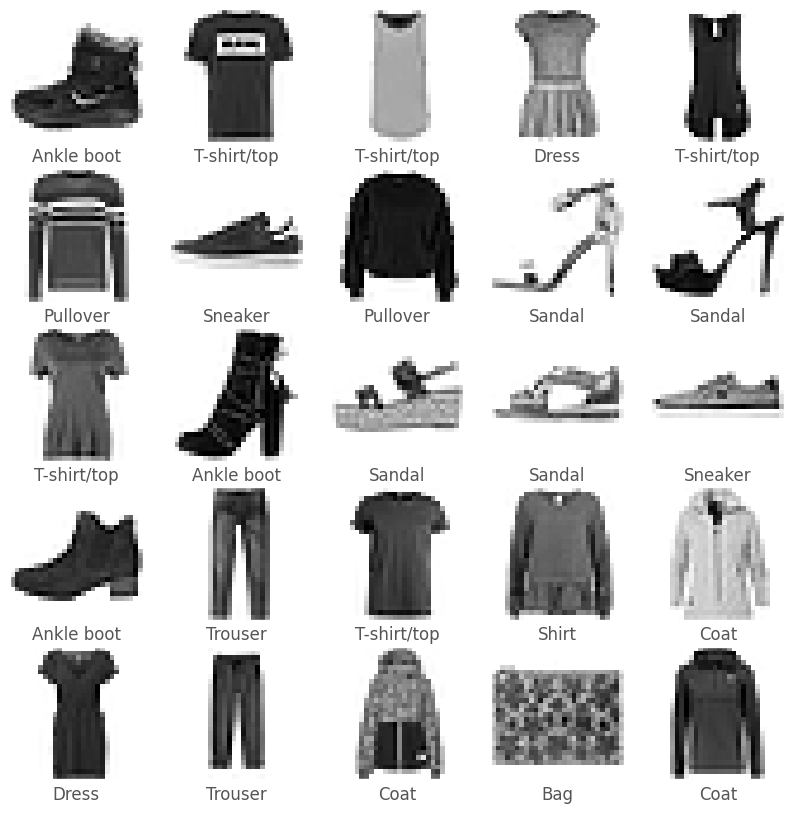

In [5]:
#TODO: Muestra algunas imágenes de los datos de entrenamiento

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [6]:
#TODO: Prepara los datos de entrenamiento y prueba para poder ser procesados por una red neuronal
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Aquí necesitas definir tu modelo. Recuerda que cada imagen en el conjunto de datos tiene un tamaño de `28 x 28`, así que tu `Input` debería tener un tamaño de: `(28,28)`.

Además, no olvides que necesitas implementar un MLP muy simple aquí, con solo unas pocas capas `Dense`. Echa un vistazo a este diagrama de bloques que representa un MLP simple.


<center>
<img src="https://github.com/sofiapapadron/IME_IAA/blob/main/Teoria/2_Clasificacion_imagenes_Keras/1_Fundamentos_Keras/apps/images/mlps_fashion_mnist.webp?raw=1" width=800px>
</center>

In [7]:
#TODO: Define el modelo y muestra un resumen del mismo
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

En esta ocasión agregaremos otro argumento al método compile, que es `metrics=['accuracy']`. Esto nos permitirá ver la precisión del modelo en cada época.

**La precisión es una métrica importante para evaluar el rendimiento de un modelo de clasificación y será revisada en futuros cuadernos.**

In [8]:
#TODO: Compila el modelo con optimizador adam, función de pérdida categorical_crossentropy  y métrica accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#TODO: Entrena la red neuronal con un 20% de los datos de entrenamiento como datos de validación (validation_split=0.2)
training_results = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VAL_SPLIT)

54000/54000 ━━━━━━━━━━━━━━━━━━━━ 296s 5ms/step - accuracy: 0.7723 - loss: 0.6285 - val_accuracy: 0.8397 - val_loss: 0.4348


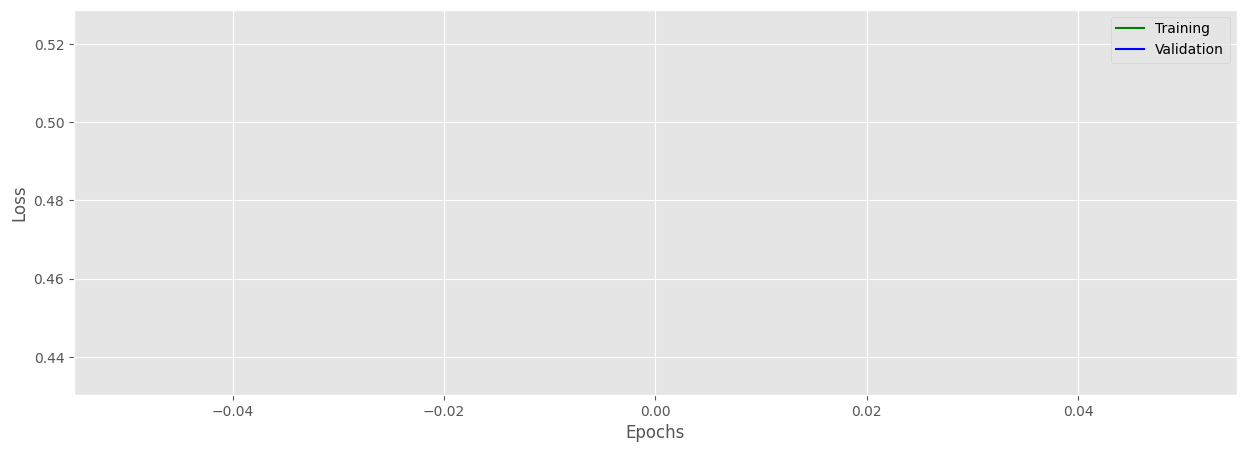

In [10]:
plt.figure(figsize=[15,5])
plt.plot(training_results.history['loss'], 'g')
plt.plot(training_results.history['val_loss'], 'b')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['Training', 'Validation'], loc='upper right');
plt.grid(True)

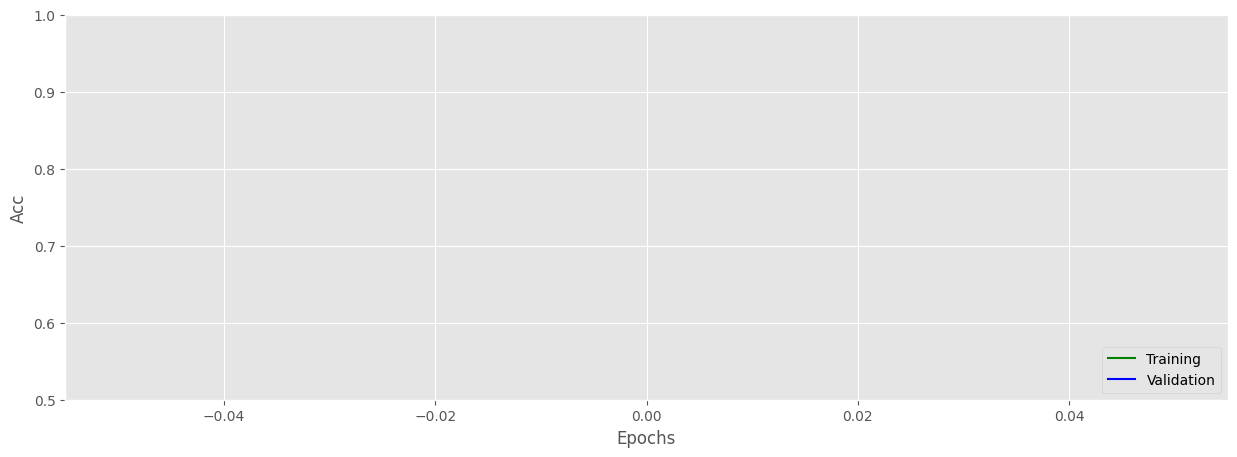

In [11]:
plt.figure(figsize=[15,5])
plt.plot(training_results.history['accuracy'], 'g')
plt.plot(training_results.history['val_accuracy'], 'b')

plt.ylim([0.5, 1])

plt.xlabel('Epochs')
plt.ylabel('Acc')

plt.legend(['Training', 'Validation'], loc='lower right');
plt.grid(True)

A continuación, usa tu modelo entrenado para obtener predicciones para 25 datos de muestra.

Puedes encontrar útiles las funciones [model.predict](https://keras.io/api/models/model_training_apis/), [np.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html), [np.expand_dims](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html) y [np.squeeze](https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html).


In [12]:
#TODO: Realiza predicciones con el modelo entrenado
import numpy as np

predictions = model.predict(X_test[:25])
predictions = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


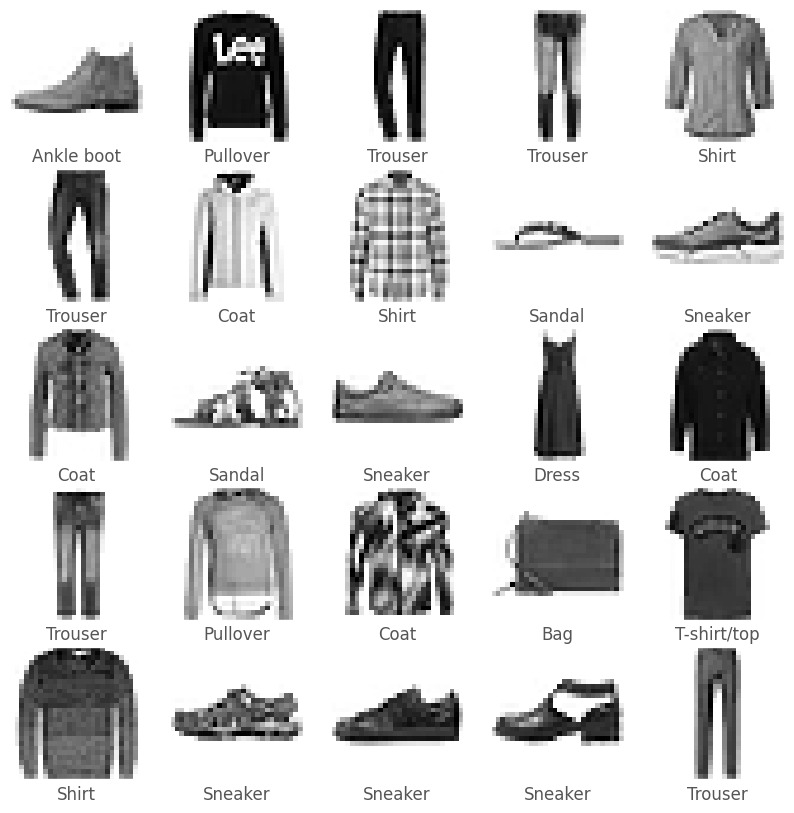

In [14]:
#TODO: Muestra algunas imágenes de prueba y sus predicciones como labels
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[predictions[i]])
plt.show()